In [20]:
from datetime import datetime

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

In [2]:
figsize = (15, 10)

In [3]:
df = pd.read_csv(r'BD Tratado\baseFim.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MATRÍCULA         99550 non-null  int64  
 1   DATA              99550 non-null  object 
 2   ATRASO            99550 non-null  float64
 3   Carga             99405 non-null  float64
 4   NOTURNO           49602 non-null  float64
 5   NÚM. VIAGENS DIA  74650 non-null  float64
 6   VALOR POR VIAGEM  74650 non-null  float64
 7   Tempo de casa     99550 non-null  float64
 8   SALÁRIO           99550 non-null  float64
 9   SO                89101 non-null  float64
 10  SX                89101 non-null  float64
 11  Ativo             99550 non-null  int64  
 12  MANUAL            99550 non-null  float64
 13  dist              63301 non-null  float64
 14  HORÁRIO INÍCIO    99550 non-null  float64
 15  HORÁRIO FINAL     99550 non-null  float64
dtypes: float64(13), int64(2), object(1)
memo

In [4]:
df['DATA'].head() 

0    2020-01-03 00:00:00
1    2020-01-10 00:00:00
2    2020-01-20 00:00:00
3    2020-01-21 00:00:00
4    2020-01-22 00:00:00
Name: DATA, dtype: object

C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


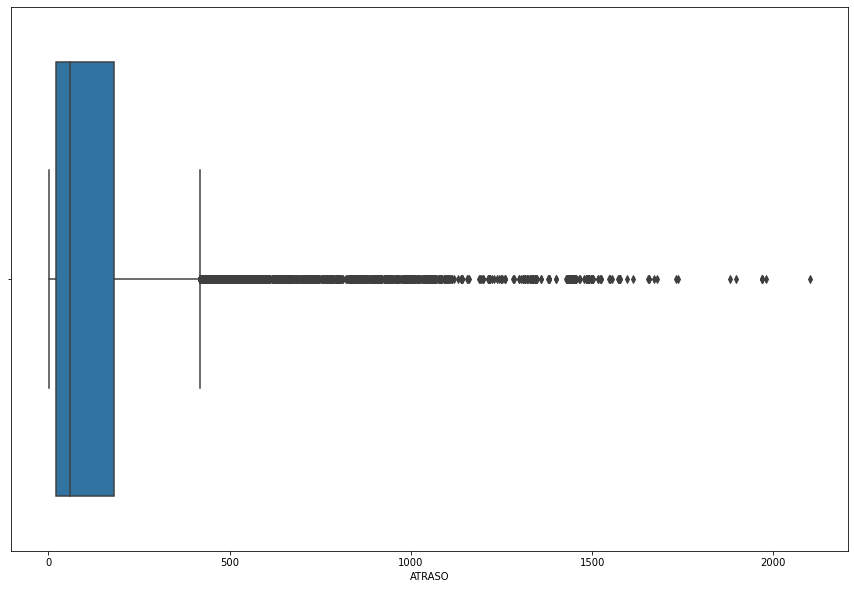

In [5]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(df['ATRASO'])

In [6]:
# Muito outlier na vairável resposta

def limpeza_outliers(df, value):
    i = 0
    linhas_ini = df.shape[0]
    linhas_ant = 1
    linhas_dps = 0
    while (linhas_ant != linhas_dps) & (i <= 10):
        Q1 = df[value].quantile(0.25)
        Q3 = df[value].quantile(0.75)
        IQR = Q3 - Q1
        linhas_ant = df.shape[0]
        df = df[df[value] > (Q1 - 1.5*IQR)]
        df = df[df[value] < (Q3 + 1.5*IQR)]
        linhas_dps = df.shape[0]
        i = i + 1
    return df, linhas_ini, linhas_dps, i

In [7]:
df, antes, depois, contagem = limpeza_outliers(df, 'ATRASO')
print('linhas antes: ', antes)
print('linhas depois: ', depois)
print('quantas interações: ', contagem)

linhas antes:  99550
linhas depois:  69682
quantas interações:  6


C:\Users\gabri\anaconda3\envs\faculdade\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


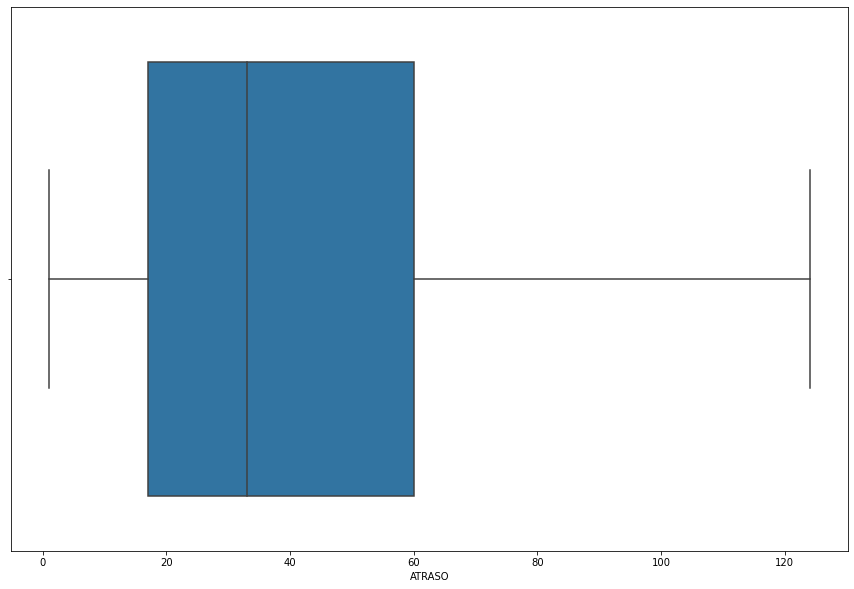

In [8]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(df['ATRASO'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69682 entries, 0 to 99549
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MATRÍCULA         69682 non-null  int64  
 1   DATA              69682 non-null  object 
 2   ATRASO            69682 non-null  float64
 3   Carga             69578 non-null  float64
 4   NOTURNO           36395 non-null  float64
 5   NÚM. VIAGENS DIA  54734 non-null  float64
 6   VALOR POR VIAGEM  54734 non-null  float64
 7   Tempo de casa     69682 non-null  float64
 8   SALÁRIO           69682 non-null  float64
 9   SO                61474 non-null  float64
 10  SX                61474 non-null  float64
 11  Ativo             69682 non-null  int64  
 12  MANUAL            69682 non-null  float64
 13  dist              44224 non-null  float64
 14  HORÁRIO INÍCIO    69682 non-null  float64
 15  HORÁRIO FINAL     69682 non-null  float64
dtypes: float64(13), int64(2), object(1)
memo

In [10]:
#Weekday	Output
#Sunday	    0
#Monday	    1
#Tuesday	2
#Wednesday	3
#Thursday	4
#Friday	    5
#Saturday	6

df['DiaSemana'] = df['DATA'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())
df = df.merge(pd.get_dummies(df['DiaSemana'],prefix='DiaSemana'),how='inner', left_index=True, right_index=True)
df[['DiaSemana', 'DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6']].head()

,DiaSemana,DiaSemana_0,DiaSemana_1,DiaSemana_2,DiaSemana_3,DiaSemana_4,DiaSemana_5,DiaSemana_6
0,4,0,0,0,0,1,0,0
1,4,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0
4,2,0,0,1,0,0,0,0


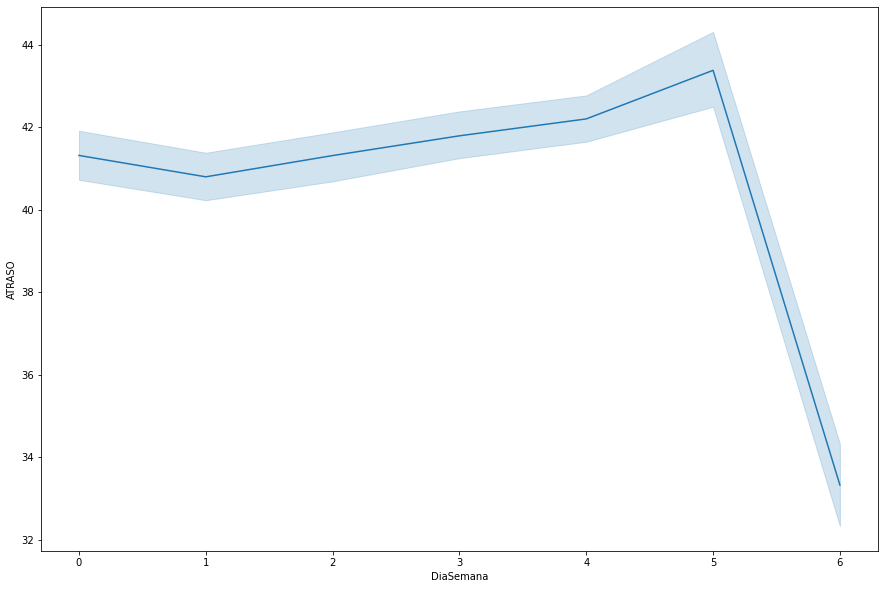

In [11]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['DiaSemana'], y = df['ATRASO'])

In [12]:
df['Mes'] = df['DATA'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df = df.merge(pd.get_dummies(df['Mes'],prefix='Mes'),how='inner', left_index=True, right_index=True)
df[['Mes', 'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12']]

,Mes,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,1,1,0,0,0,0,0,0,0,0,0,0,0
99546,1,1,0,0,0,0,0,0,0,0,0,0,0
99547,1,1,0,0,0,0,0,0,0,0,0,0,0
99548,1,1,0,0,0,0,0,0,0,0,0,0,0


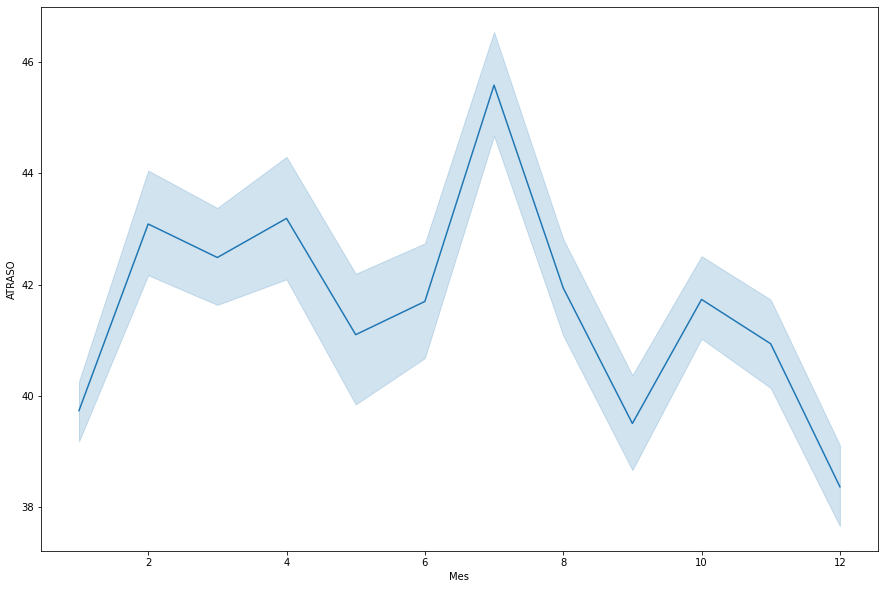

In [13]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['Mes'], y = df['ATRASO'])

In [14]:
df = df.drop(['DATA'],axis=1)
df.shape

(69682, 36)

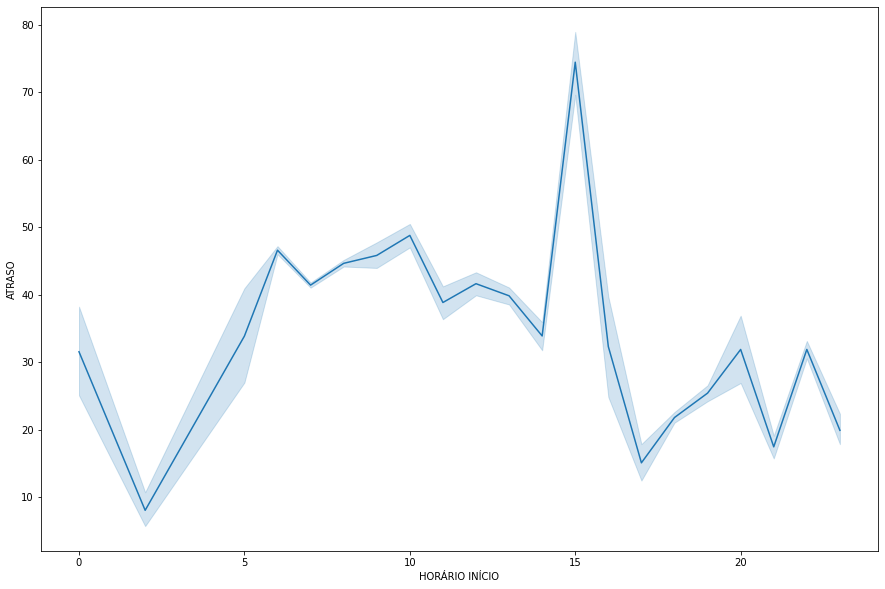

In [15]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['HORÁRIO INÍCIO'], y = df['ATRASO'])

In [16]:
df[['MATRÍCULA', 'HORÁRIO INÍCIO', 'ATRASO']].head()

,MATRÍCULA,HORÁRIO INÍCIO,ATRASO
0,3108,6.0,1.0
1,3108,6.0,72.0
2,3108,6.0,46.0
3,3108,6.0,47.0
4,3108,6.0,32.0


In [17]:
df[['MATRÍCULA', 'HORÁRIO INÍCIO','ATRASO']][df['HORÁRIO INÍCIO'] < 3].sort_values('ATRASO',ascending=False).drop_duplicates('MATRÍCULA')

,MATRÍCULA,HORÁRIO INÍCIO,ATRASO
98077,234975,2.0,123.0
43117,227262,0.0,120.0
93643,234093,2.0,107.0
95911,234538,0.0,104.0
48403,228468,0.0,104.0
41518,227183,0.0,88.0
97965,234962,2.0,81.0
78808,232511,0.0,74.0
52639,229381,0.0,71.0
98045,234971,2.0,70.0


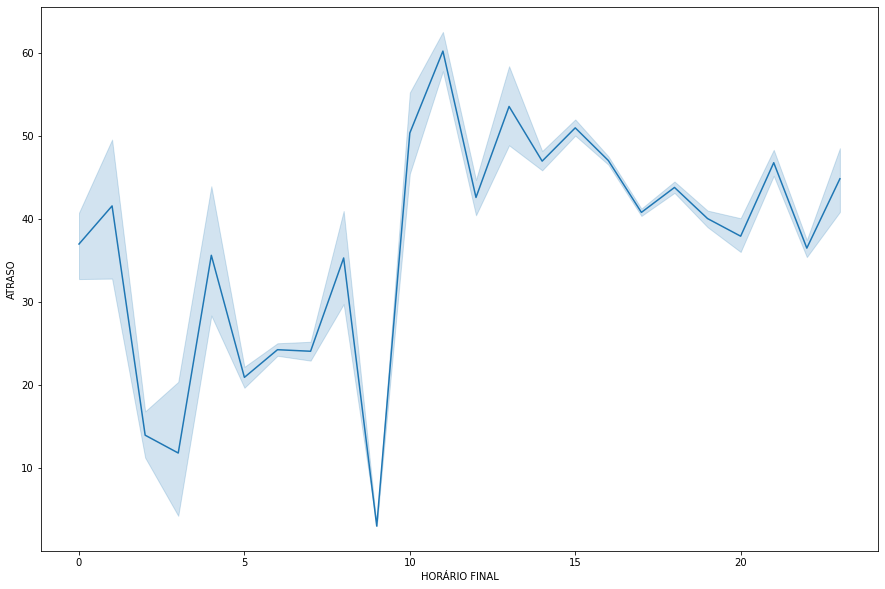

In [18]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x=df['HORÁRIO FINAL'], y = df['ATRASO'])

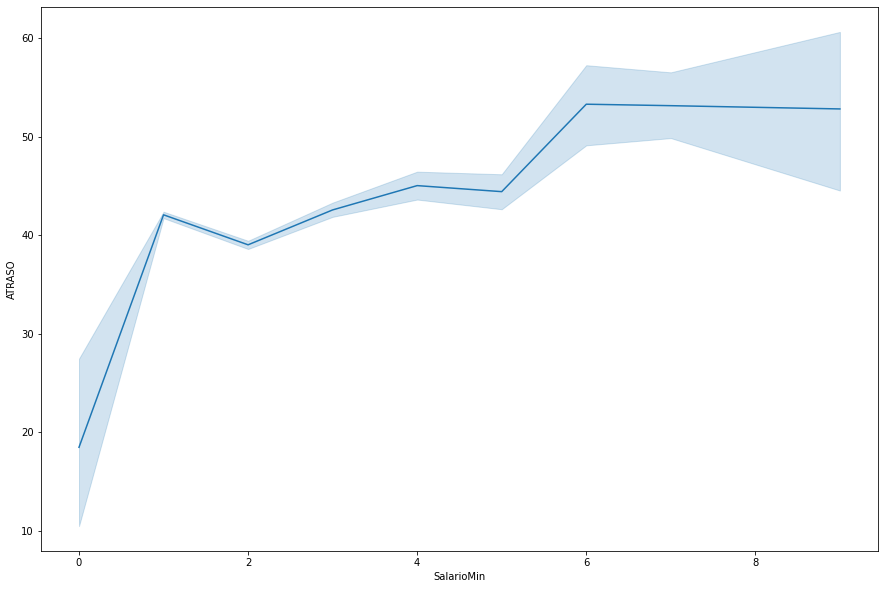

In [24]:
fig, ax = plt.subplots(figsize=figsize)

df['SalarioMin'] = round(df['SALÁRIO']/1100)

sns.lineplot(x=df['SalarioMin'], y = df['ATRASO'])